In [147]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
import csv
import time

import sys


In [148]:
all_data = []

In [149]:
#read in blob dataset

X_training = []
y_training = []
header = []
c = 0
with open("DataSets/blob_att.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row
            c+=1
            continue
        X_training.append([ float(x) for x in row])
        
with open("DataSets/blob_label.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        y_training.append(int(row[0]))

        
        
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])

In [150]:
#read in irirs dataset
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/iris.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row[:-1]
            c+=1
            continue
        X_training.append([float(x) for x in row[:-1]])
        y_training.append(row[-1])
        #print(row)

for i in range(len(y_training)):
    if(y_training[i] == "Setosa"):
        y_training[i] = 1
    if(y_training[i] == "Versicolor"):
        y_training[i] = 2
    if(y_training[i] == "Virginica"):
        y_training[i] = 3


X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])

In [151]:
#read in wine dataset
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/winequality-white_att.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row
            c+=1
            continue
        X_training.append([float(x) for x in row[:-1]])
        y_training.append(float(row[-1]))

X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])
print(header)
print(X_train)
print(y_training)

['fixed acidity', '"volatile acidity"', '"citric acid"', '"residual sugar"', '"chlorides"', '"free sulfur dioxide"', '"total sulfur dioxide"', '"density"', '"pH"', '"sulphates"', '"alcohol"']
[[8.4, 0.2, 0.38, 11.8, 0.055, 51.0, 170.0, 1.0004, 3.34, 0.82, 8.9], [8.0, 0.24, 0.48, 6.8, 0.047, 13.0, 134.0, 0.99616, 3.23, 0.7, 10.0], [7.1, 0.24, 0.41, 17.8, 0.046, 39.0, 145.0, 0.9998, 3.32, 0.39, 8.7], [5.9, 0.25, 0.24, 7.4, 0.044, 21.0, 113.0, 0.99462, 3.38, 0.58, 10.5], [6.7, 0.44, 0.31, 1.9, 0.03, 41.0, 104.0, 0.99, 3.29, 0.62, 12.6], [7.1, 0.18, 0.49, 1.3, 0.033, 12.0, 72.0, 0.99072, 3.05, 0.53, 11.3], [7.0, 0.24, 0.3, 6.7, 0.039, 37.0, 125.0, 0.99436, 3.2, 0.39, 9.9], [6.0, 0.24, 0.33, 2.5, 0.026, 31.0, 85.0, 0.99014, 3.13, 0.5, 11.3], [6.5, 0.35, 0.31, 10.2, 0.069, 58.0, 170.0, 0.99692, 3.18, 0.49, 9.4], [6.4, 0.25, 0.41, 8.6, 0.042, 57.0, 173.0, 0.9965, 3.0, 0.44, 9.1], [7.0, 0.31, 0.26, 7.4, 0.069, 28.0, 160.0, 0.9954, 3.13, 0.46, 9.8], [7.2, 0.16, 0.49, 1.3, 0.037, 27.0, 104.0, 0.

In [152]:
#read in house price dataset
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/house_att.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row
            c+=1
            continue
        X_training.append([float(x) for x in row])
        
with open("DataSets/house_price.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        y_training.append(float(row[0]))

        
print(len(X_training))
print(len(y_training))
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])


10000
10000


In [153]:
#Sort dataset by an attribute.(increasing order)
def sort_f(X,y,column):
    

  
    sortf = zip(X,y)
    sortf= sorted(sortf,key = lambda x:x[0][column])
    X = [x for x,y in sortf]
    y = [y for x,y in sortf]

    return X,y

In [154]:
class Tree:
    def __init__(self,X,feature_names,labels):
        
        self.X = X
        self.num_of_nodes = 0
        self.currentsplit = 0
        self.split_result = 0
        self.feature_names = feature_names 
        self.labels = labels
        self.nodes = []
        self.leaf = 0
        

In [155]:
class Node:
    def __init__(self,labels,X,feature_ids):
        
        self.split_result = 0
        self.split = 0 
        self.feature_ids = feature_ids
        self.labels = labels
        self.X = X
        self.nodes = []
        
        self.leaf = 0 #true or false

In [156]:
def get_features(X,labels,column,split_value):

    #Split the dataset into two parts
    #The first part has values  lower than split_value
    #The second part has values  bigger or equal than split_value
    #start = time.time()

    
    
    features = [ X[i][column] for i in range(len(X)) ]
    sub_labels = []
    
    sub_label1 = []
    sub_label2 = []
    sub_x1 = []
    sub_x2 = []


    for x in range(len(features)):
        if(features[x]<=split_value):
            sub_label1.append(labels[x])
            sub_x1.append(X[x])
        else:
            sub_label2.append(labels[x])
            sub_x2.append(X[x])

    
    sub_labels.append([sub_label1,sub_x1,column])
    sub_labels.append([sub_label2,sub_x2,column])


        
    #return splited data,containing the labels,features and the the column
    return sub_labels

In [157]:
#calcualte standard deviation
def calculate_std(data):
   
    mean = sum(data)/len(data)
    
    variance = 0
    
    for i in data:
        variance += (i-mean)**2
    
    return variance/len(data)
    return math.sqrt(variance/len(data))
    

In [158]:
def calculate_split_std2(X,labels,column,split_value):
    #calculate the standard deviation on the splited data,add them together and return that value
    
    
    variance_sum = 0
    #get the splited dataset
    sub_labels = get_features(X,labels,column,split_value) 

    
    for i in sub_labels:

        if(len(i[0]) == 0):         
            return -1,0
        variance_sum += calculate_std(i[0])
        #variance_sum += (len(i[0])/len(labels))*calculate_std(i[0])
    #variance = calculate_std(labels) - variance_sum
    
    return variance_sum,sub_labels

In [ ]:
def calculate_split_std(X,labels,column,split_value):
    #calculate the standard deviation on the splited data,add them together and return that value
    
    
    variance_sum = 0
    #get the splited dataset
    sub_labels = get_features(X,labels,column,split_value) 

    
    for i in sub_labels:

        if(len(i[0]) == 0):
            return -1,0
        
        variance_sum += calculate_std(i[0])

    
    return variance_sum,sub_labels

In [159]:
def find_best_split(X,labels,feature_ids):
    #for each column we try to find the best split_value
    #we return the split_value wich results in the lowest standard deviation
    
    
    lowest_v = -1
    split = 0
    split_value = 0
    V = 0 
    
    features = 0 
    svalue = 0
    min_sub_labels = 0
    
    
    for i in feature_ids:
        
            #start = time.time()

            X,labels = sort_f(X,labels,i)
            
            
            features = [ X[j][i] for j in range(len(X))] 

            

            for k in range(0,len(features)-1,2): 
                
                svalue = (features[k]+features[k+1])/2
                #svalue = (features[k])
                
                V,sub_labels = calculate_split_std(X,labels,i,svalue)
                #if(b):
                #    print(V)
                if(lowest_v == -1):
                    lowest_v = V
                    split_value = svalue
                    largest_v = V
                    split = i
                    min_sub_labels = sub_labels
                #after the split, if the standard deviation is lower than in a previous split, we choose this one
                if(V>lowest_v and V != -1):


                    split_value = svalue
                    lowest_v = V
                    split = i
                    min_sub_labels = sub_labels

    return split,split_value,min_sub_labels

In [160]:
def build_tree(X,feature_ids,labels,leaf_size,var,depth):
    #find the best split for creating sub_nodes
    #return sub_nodes
    
   
    split = 0 
    sub_nodes = []
    


    split,split_value,node_labels = find_best_split(X,labels,feature_ids)

    for i in node_labels:

        if(len(i[0]) == 0):
            continue
        #print(len(i[1]))
        node = Node(i[0],i[1],feature_ids)
        node.split = split
        node.split_result = split_value
        
        
    
        if(len(node.labels) <= leaf_size or calculate_std(node.labels)<var):

            node.leaf = 1
            
        else:
            node.leaf = 0
            
        sub_nodes.append(node)
    

    depth +=1
    #print('Depth:',depth)
    leaf =  0
    for i in sub_nodes:
        
        if(i.leaf == 1):
            leaf +=1
            
    if(leaf == len(sub_nodes)):

        return sub_nodes
    
    
    if(sub_nodes[0].leaf == 1 and sub_nodes[1].leaf == 1):
        return sub_nodes
    
    
    
    else:
        for node in sub_nodes:

            if(node.leaf == 0):
                
                node.nodes = build_tree(node.X,node.feature_ids,node.labels,leaf_size,var,depth)


    return sub_nodes   

In [161]:
def inicialize(X,feature_names,labels,leaf_size,var):
    
    depth = 1
    
    feature_ids = [x for x in range(len(feature_names))]
    tree = Tree(X,feature_names,labels)
    #start building tree
    tree.nodes = build_tree(X,feature_ids,labels,leaf_size,var,depth)
    return tree

In [162]:
forest = []
times = []
limits = [0.1]

size = 20
counter = 0
var = 0
#for each dataset we build a tree and mesure the elapsed time
for i in all_data:

    f = []
    t = []
    if(counter == 0):
        size = 20
        var = 1.0
    if(counter == 1):
        size =10
        var = 0.2
    if(counter == 2):
        size =20
        var = 0.5
    if(counter == 3):
        size = 20
        var = 1
    
        
    print("-------------------------------------------------------")
    start = time.time()
    tree = inicialize(i[0],i[-1],i[2],size,var)
    end = time.time()
    f.append(tree)
    print(end-start)
    t.append(end-start)
    counter+=1
    forest.append(f)
    times.append(t)

-------------------------------------------------------


KeyboardInterrupt: 

In [ ]:
#go through the nodes until a leaf is reached
#return the avarage value in the leaf
def predict(node,value):
    
    if(node.leaf == 1):
        #print('LEAF')
        p = sum(node.labels)/len(node.labels)
        
        return p
    else:
        try:

            if (value[node.nodes[0].split] <=  node.nodes[0].split_result):

                p=predict(node.nodes[0],value)
                return p
            else:
                p=predict(node.nodes[1],value)
                return p
        except:
            return sum(node.labels)/len(node.labels)


In [ ]:


predicted_value = []#predicted points
difference = []
MSE = []
sum_y = []

#all_difference = []
all_mse = []


#for each tree we calculate the mean squared error
#all_data = [X_train,X_test,y_train,y_test,header]
for v in range(len(forest)):
    MSE = []
    for i in forest[v]:
        j = all_data[v]
        
        X_test = j[1]
        y_test = j[3]
        pv = []
        error = 0
        mse = 0
        for k in range(len(X_test)): 


            p = predict(i,X_test[k])

   
            error += abs(y_test[k]-p)
            mse += (y_test[k]-p)**2
            pv.append(p)           


        sum_y.append(sum(y_test))
        predicted_value.append(pv)
        difference.append(error)
        MSE.append(mse/len(X_test))

    all_mse.append(MSE)
    
    
print(difference)
print(sum_y)

print(all_mse)
#save the results

with open("Results/difference_rt2.csv", 'a',newline='') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    for row in all_mse:
        writer.writerow(row)

with open("Results/times_rt2.csv", 'a',newline='') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    for row in times:
        writer.writerow(row)


[5405.434766892036]
[615888.7599377787]
[[12.048991591579627]]


'with open("Results/difference_rt.csv", \'a\',newline=\'\') as f:\n    # create the csv writer\n    writer = csv.writer(f)\n\n    # write a row to the csv file\n    for row in all_mse:\n        writer.writerow(row)\n\nwith open("Results/times_rt.csv", \'a\',newline=\'\') as f:\n    # create the csv writer\n    writer = csv.writer(f)\n\n    # write a row to the csv file\n    for row in times:\n        writer.writerow(row)'

2000
615888.7599377787


Text(0.5, 1.0, 'Test data')

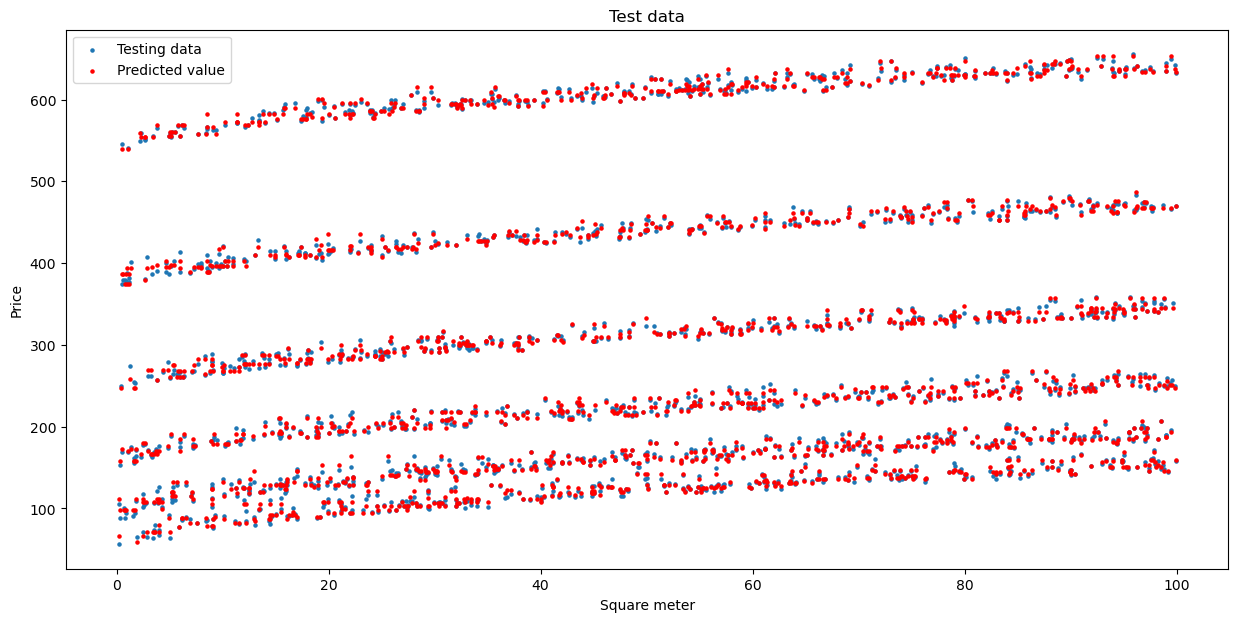

In [ ]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(y_test))
#print(len(predicted_value[14]))
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ], predicted_value[0],c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test data")